# Logistic Regression Proof of Concept

This notebook demonstrates a complete proof-of-concept implementation of **Logistic Regression** using a synthetic dataset. It walks through the full machine learning workflow from preprocessing to evaluation and visualization.

---

## 📊 Project Overview

This notebook includes:

1. Loading and inspecting the dataset  
2. Splitting features and target  
3. Performing a train/test split (with stratification)  
4. Scaling features  
5. Training a Logistic Regression model  
6. Making predictions  
7. Evaluating model performance  
8. Visualizing a confusion matrix  

This serves as a clean, easy-to-understand example suitable for machine learning learning, demonstrations, or GitHub portfolios.

---

## 📁 Dataset Description

The dataset used here contains:

- **1,000 samples**  
- **3 numeric features:** `feature_1`, `feature_2`, `feature_3`  
- **1 binary target variable:** `target`  

The features were generated from different distributions, and the target was produced using a logistic function — making Logistic Regression an appropriate modeling choice.

---

## 🧠 Workflow Breakdown

### **1. Load and Inspect Data**
Use pandas to load the CSV and preview the structure.

### **2. Split Features and Target**
Define:
- `X` as the feature matrix  
- `y` as the binary target  

### **3. Train/Test Split**
Use `train_test_split` with:
- `test_size=0.2`  
- `random_state=42`  
- `stratify=y` to preserve class balance  

### **4. Feature Scaling**
Apply `StandardScaler`:
- Fit on `X_train` only  
- Transform both `X_train` and `X_test`  

This avoids data leakage.

### **5. Train the Logistic Regression Model**
Train the model using the scaled training data.

### **6. Make Predictions**
Generate predictions on the scaled test set.

### **7. Evaluate Model Performance**
Calculate:
- Accuracy  
- Confusion matrix  
- Precision, recall, and F1 score (classification report)  

### **8. Visualize the Confusion Matrix**
Plot a heatmap for clear visual interpretation of model performance.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/logistic_regression_demo.csv")

print(df.head())
# dataset contains 3 numerical features that contribute to a binary target

   feature_1  feature_2  feature_3  target
0   0.496714   5.798711  -0.371574       0
1  -0.138264   4.849267  -1.735961       0
2   0.647689   3.119261  -0.604718       0
3   1.523030   1.706126  -1.556008       0
4  -0.234153   4.396447   1.232941       0


In [ ]:
# split data into features (X) and target (y)

X = df[["feature_1", "feature_2", "feature_3"]]
y = df["target"]

# split into training and testing sets, use stratify to ensure both sets have same proportion of each class as original dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# apply scaler to training set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # make sure to use only .transform() so it applies same scaling WITHOUT refitting

# Logistic Regression Overview

Logistic Regression is a **machine learning algorithm** used to **predict yes/no outcomes** (like 0 or 1, true or false).

---

## How It Works

1. **Combine the input features**  
   The model multiplies each input feature by a weight and adds a bias to get a single number:


2. **Convert to a probability**  
The number is passed through a **sigmoid function** to get a value between 0 and 1:


This represents the probability that the outcome is 1.

3. **Decide on a class**  
Usually:
- If probability >= 0.5 → predict 1  
- If probability < 0.5 → predict 0

---

## Training the Model

- The goal is to **find the best weights and bias** so predictions are close to actual outcomes.  
- The model measures error with a **loss function** (binary cross-entropy) and adjusts weights using optimization methods like **gradient descent**.

---

## Key Points

- Outputs probabilities, not just class labels.  
- Works best with linearly separable data.  
- Features should be scaled for faster and more stable training.  
- Weights are interpretable: larger weights = more influence on the prediction.

---

## Advantages

- Simple and easy to understand  
- Fast to train  
- Provides probabilities  
- Good baseline for classification tasks  

---

## Limitations

- Can’t capture complex non-linear relationships alone  
- Sensitive to outliers  
- Performance may drop if features are highly correlated  

---


In [ ]:
# setup logistic regression model and train it using training set
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# now, let's compute accuracy, confusion matrix, and classification report to see how the predictions turned out
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy: compares number of correct predictions / total prediction to give % correct
acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy: ", acc, "%")

# confusion matrix: shows correctly labelled data points (top left is true negative, bottom right is true positive)
cm = confusion_matrix(y_pred, y_test)
print("\nConfusion matrix:\n", cm)

# classification report: shows precision, recall, f1-score, and support
# precision: when my model predicts label 1 for ex, how often is it right? TP / (TP + FP)
# recall: of all the actual label 1s, how many did my model correctly label as 1? TP / (TP + FN)
# f1-score: how balanced is my model of correctly labelling TP and avoiding false alarms? (2 * ((precision * recall) / (precision + recall)))
# support: number of true predictions for each class
cr = classification_report(y_pred, y_test)
print("\nClassification report:\n", cr)

Accuracy:  95.0 %

Confusion matrix:
 [[143   6]
 [  4  47]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       149
           1       0.89      0.92      0.90        51

    accuracy                           0.95       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.95      0.95      0.95       200



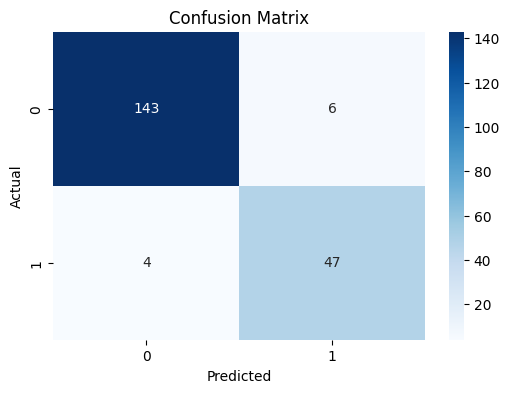

In [ ]:
# let's also plot the confusion matrix to make it easier to understand (especially for stakeholders)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()